<a href="https://colab.research.google.com/github/JHJ4012/tensorflow_studying/blob/master/tensorflow_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4423680/4422102 [==============================] - 0s 0us/step


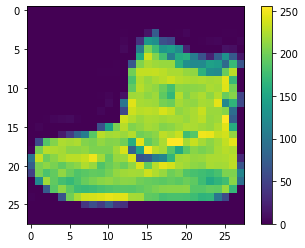

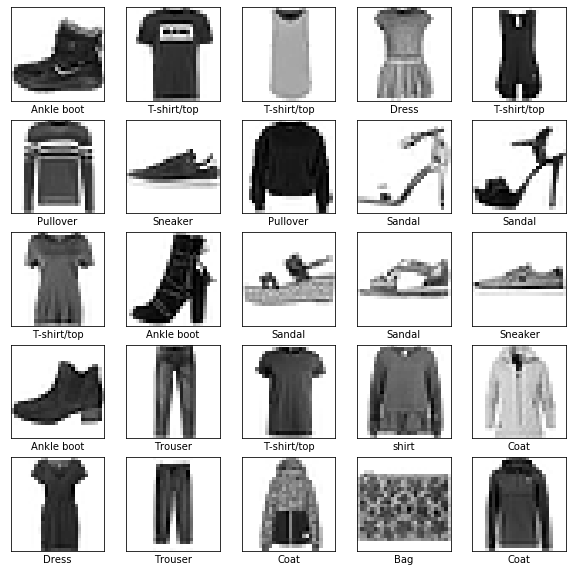

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5004 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3776 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3391 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3134 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2979 - acc: 0.8900
10000/10000 - 0s - loss: 0.3501 - acc: 0.8735

테스트 정확도 :  0.8735


Text(0.5, 0, 'Bag')

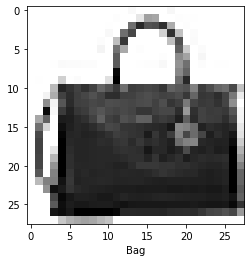

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\n테스트 정확도 : ', test_acc)

#전체 확인
#predictions = model.predict(test_images)

#하나를 골라서 확인
img = test_images[30]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
label = np.argmax(predictions_single[0])
plt.imshow(img[0], cmap = plt.cm.binary)
plt.xlabel(class_names[label])